## Task 1

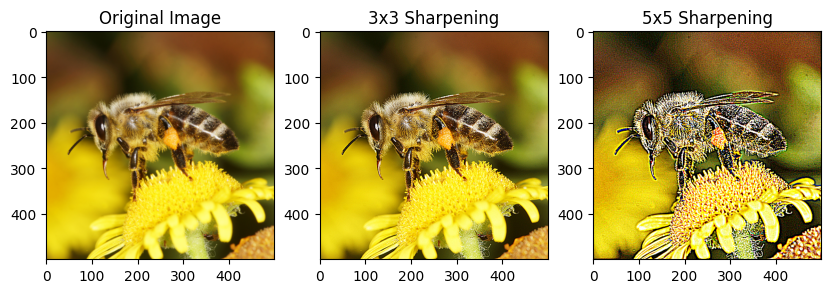

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('native-bee.png')

# Define the 3x3 and 5x5 sharpening kernels
kernel_3x3 = np.array([[0, -1, 0], 
                       [-1, 5, -1], 
                       [0, -1, 0]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, 25, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1]])

# Apply the kernels
output_3x3 = cv2.filter2D(image, -1, kernel_3x3)
output_5x5 = cv2.filter2D(image, -1, kernel_5x5)

# Display the outputs
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,3,2), plt.imshow(cv2.cvtColor(output_3x3, cv2.COLOR_BGR2RGB)), plt.title('3x3 Sharpening')
plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(output_5x5, cv2.COLOR_BGR2RGB)), plt.title('5x5 Sharpening')
plt.show()


## Task 2

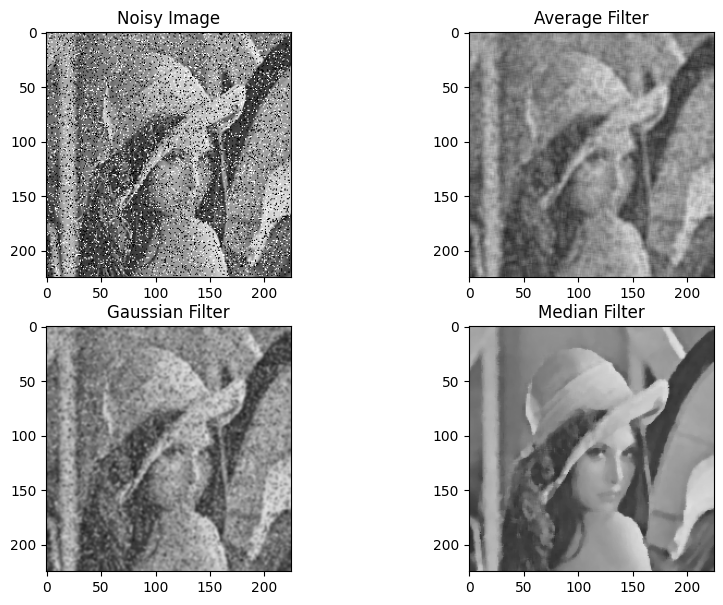

In [32]:
# Load the noisy image
noisy_image = cv2.imread('noise_lena.jpg')

# Apply Average filter
avg_filtered = cv2.blur(noisy_image, (5, 5))

# Apply Gaussian filter
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Median filter
median_filtered = cv2.medianBlur(noisy_image, 5)

# Display the results
plt.figure(figsize=(10,7))
plt.subplot(2,2,1), plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)), plt.title('Noisy Image')
plt.subplot(2,2,2), plt.imshow(cv2.cvtColor(avg_filtered, cv2.COLOR_BGR2RGB)), plt.title('Average Filter')
plt.subplot(2,2,3), plt.imshow(cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB)), plt.title('Gaussian Filter')
plt.subplot(2,2,4), plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB)), plt.title('Median Filter')
plt.show()


## Task 3

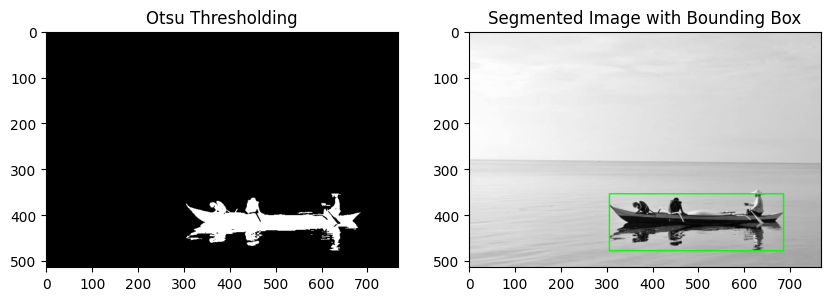

In [30]:
# Load the image
boat_image = cv2.imread('boat.jpg', 0)

# Apply Otsu's Thresholding
_, thresh = cv2.threshold(boat_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours and draw bounding box
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output_image = cv2.cvtColor(boat_image, cv2.COLOR_GRAY2BGR)

# remove overlapping box
unique_box = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    inner = False
    outer = False
    cur_inner_idx = []
    for idx, i in enumerate(unique_box):
        #not to include the current bounding if the point is within previous bounding box
        if i[0] <= x <= i[0]+i[2] and i[1] <= y <= i[1]+i[3]:
            inner = True
        #remove the previous bounding box if the previous bounding's point is within the current bounding box
        if x <= i[0] <= x+w and y <= i[1] <= y+h:
            outer = True
            cur_inner_idx.append(idx)
    if not inner:
        unique_box.append([x,y,w,h])
    if outer:
        minus = 0 
        for idx in cur_inner_idx:
            idx -= minus
            unique_box.pop(idx)
            minus += 1

for i in unique_box:
    x, y, w, h = i[:]
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10,7))
plt.subplot(1,2,1), plt.imshow(thresh, cmap='gray'), plt.title('Otsu Thresholding')
plt.subplot(1,2,2), plt.imshow(output_image), plt.title('Segmented Image with Bounding Box')
plt.show()
